<a href="https://colab.research.google.com/github/donghyeonan/eel-weight-prediction-with-CNN/blob/main/%EB%B1%80%EC%9E%A5%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from matplotlib.image import imread 
import json
import glob

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [ ]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [ ]:
# 디렉토리 변경
os.chdir('/content/drive/MyDrive/data/뱀장어/dataset/train')

In [ ]:
train_list = os.listdir()
train_list.sort(key = float)
json_list = []

In [ ]:
train_list

['10.085',
 '10.501',
 '20.055',
 '20.634',
 '20.826',
 '21.020',
 '21.213',
 '21.406',
 '21.599',
 '21.792',
 '21.985',
 '22.371',
 '23.066',
 '23.182',
 '23.530',
 '23.646',
 '23.679',
 '23.879',
 '23.995',
 '24.227',
 '24.294',
 '24.343',
 '24.575',
 '24.7891',
 '25.027',
 '25.344',
 '25.589',
 '25.76',
 '25.835',
 '25.899',
 '26.339',
 '26.454',
 '26.591',
 '27.009',
 '27.095',
 '27.347',
 '27.564',
 '27.598',
 '28.102',
 '28.120',
 '28.354',
 '29.110',
 '29.362',
 '29.614',
 '29.785',
 '30.118',
 '30.37',
 '31.733',
 '31.874',
 '32.157',
 '32.298',
 '32.439',
 '32.581',
 '33.005',
 '33.287',
 '33.429',
 '33.57',
 '34.639',
 '36.506',
 '39.941',
 '41.003',
 '42.065',
 '45.25',
 '46.319',
 '47.374',
 '48.435',
 '49.014',
 '49.057',
 '50.559',
 '50.613',
 '51.75',
 '52.17',
 '52.207',
 '52.664',
 '52.743',
 '53.727',
 '54.806',
 '54.95',
 '55.283',
 '55.407',
 '55.864',
 '55.868',
 '56.779',
 '56.84',
 '56.93',
 '57.236',
 '58.15',
 '58.397',
 '59.953',
 '60.2',
 '61.693',
 '65.237',

In [ ]:
# directory 경로 정의
url = '/content/drive/MyDrive/data/뱀장어/dataset/train'
for i in range(len(train_list)):
  json_list.append(os.path.join(url, train_list[i], '*.json'))

In [ ]:
# json data
for i in range(len(train_list)):
  j_dat = []
  for j in range(len(json_list)):
    j_dat.append(sorted(glob.glob(json_list[j])))

In [ ]:
# total json file
tot_json = []
for i in tqdm(range(len(j_dat))):
  json_files = []
  for j in range(len(j_dat[i])):
    with open(j_dat[i][j], 'r') as json_file:
      json_data = json.load(json_file)
    json_files.append(json_data)
  tot_json.append(json_files)

100%|██████████| 124/124 [48:55<00:00, 23.67s/it]


In [ ]:
# 124개 수조에 대해 10개 json x 50장 index 만들기
dex = []
for i in range(len(train_list)):
    b = []
    for _ in range(50):
        c = []
        for j in range(10):
            c.append(np.random.randint(len(tot_json[i])))
        b.append(c)
    dex.append(b)

In [ ]:
os.chdir('/content/drive/MyDrive/전처리/train')
for i in range(124):
    os.mkdir(train_list[i])

100%|██████████| 124/124 [16:41<00:00,  8.07s/it]


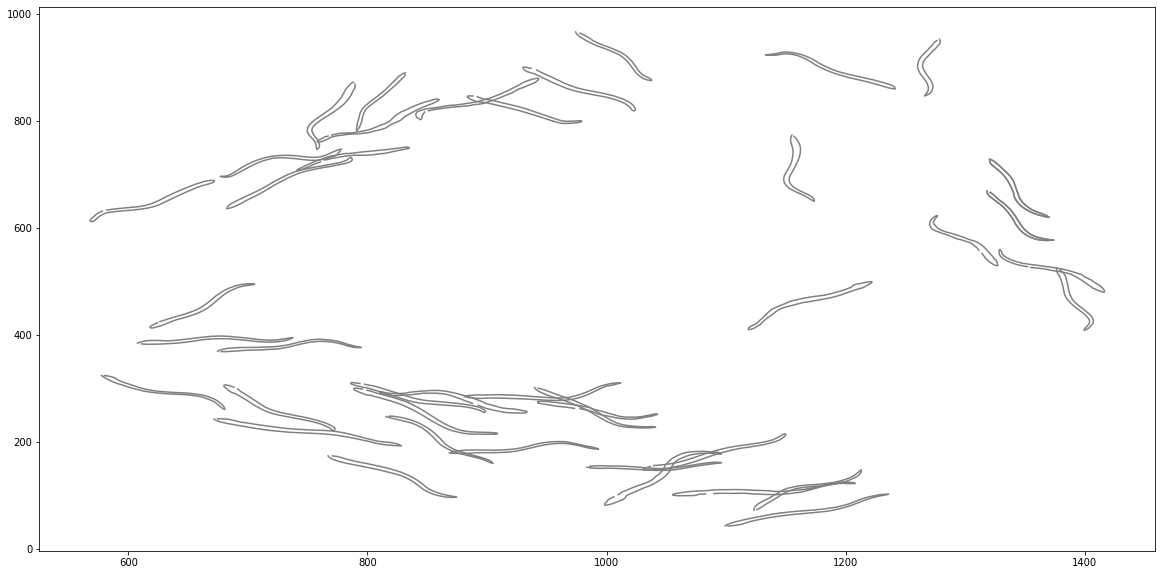

In [ ]:
plt.figure(figsize = (20,10))
plt.xlim(200, 1800)
plt.ylim(top = 1080)
for i in tqdm(range(124)):
    os.chdir(os.path.join('/content/drive/MyDrive/전처리/train', train_list[i]))
    for j in range(50):
        plt.clf()
        for k in range(10):
            for l in range(len(tot_json[i][dex[i][j][k]]['data'])):
                plt.plot(tot_json[i][dex[i][j][k]]['data'][l]['x'], tot_json[i][dex[i][j][k]]['data'][l]['y'], color = 'gray')
        plt.savefig('j' + str(j) + '.jpg')

# CNN

In [ ]:
import h5py
import scipy
import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow_datasets as tfds
from tensorflow.python.framework import ops

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
url = '/content/drive/MyDrive/전처리/train'

In [ ]:
# train set 이미지 generator
image_gen = ImageDataGenerator(
    rescale = 1./255, validation_split = 0.2
)

train_data_gen = image_gen.flow_from_directory(
    directory = url,
    shuffle=True,
    target_size = (400, 600),
    subset="training",

    class_mode = 'sparse'
)

Found 9200 images belonging to 124 classes.


In [ ]:
validation_data_gen = image_gen.flow_from_directory(
    directory = url,
    shuffle=True,
    target_size = (400, 600),
    subset="validation",
    class_mode = 'sparse'
)

Found 2238 images belonging to 124 classes.


In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(400,600,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(124),
    Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 400, 600, 16)      448       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 200, 300, 16)     0         
 g2D)                                                            
                                                                 
 dropout_61 (Dropout)        (None, 200, 300, 16)      0         
                                                                 
 conv2d_76 (Conv2D)          (None, 200, 300, 32)      4640      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 100, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 100, 150, 64)    

In [ ]:
model.compile(optimizer='Adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])

In [ ]:
batch_size = 50
epochs = 20

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch= 9200 // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps= 2238 // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
       patience=7
    )]
)

Epoch 1/20
184/184 [==============================] - 45s 243ms/step - loss: 22.2519 - accuracy: 0.0087 - val_loss: 25.6906 - val_accuracy: 0.0092
Epoch 2/20
184/184 [==============================] - 45s 245ms/step - loss: 22.1809 - accuracy: 0.0087 - val_loss: 24.1251 - val_accuracy: 0.0078
Epoch 3/20
184/184 [==============================] - 45s 246ms/step - loss: 22.0296 - accuracy: 0.0104 - val_loss: 28.3240 - val_accuracy: 0.0071
Epoch 4/20
184/184 [==============================] - 45s 247ms/step - loss: 21.9570 - accuracy: 0.0099 - val_loss: 27.9660 - val_accuracy: 0.0092
Epoch 5/20
184/184 [==============================] - 45s 243ms/step - loss: 22.2194 - accuracy: 0.0082 - val_loss: 24.3207 - val_accuracy: 0.0078
Epoch 6/20
184/184 [==============================] - 45s 243ms/step - loss: 22.0202 - accuracy: 0.0097 - val_loss: 23.9880 - val_accuracy: 0.0078
Epoch 7/20
184/184 [==============================] - 44s 238ms/step - loss: 21.7356 - accuracy: 0.0085 - val_loss: 24

In [ ]:
os.chdir('/content/drive/MyDrive/전처리')
model.save('pre1.h5')

In [ ]:
#os.chdir('/content/drive/MyDrive/data/뱀장어/dataset')
#m = tf.keras.models.load_model('model_2.h5')

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch= 4960 // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps= 1240 // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=7
    )]
)

Epoch 1/30
77/77 [==============================] - 66s 861ms/step - loss: 5.1516 - accuracy: 0.0084 - val_loss: 27.4861 - val_accuracy: 0.0084
Epoch 2/30
77/77 [==============================] - 66s 861ms/step - loss: 5.1560 - accuracy: 0.0076 - val_loss: 34.5333 - val_accuracy: 0.0074
Epoch 3/30
77/77 [==============================] - 66s 859ms/step - loss: 5.1440 - accuracy: 0.0084 - val_loss: 28.1415 - val_accuracy: 0.0105
Epoch 4/30
77/77 [==============================] - 67s 862ms/step - loss: 5.2233 - accuracy: 0.0102 - val_loss: 21.7216 - val_accuracy: 0.0084
Epoch 5/30
77/77 [==============================] - 66s 861ms/step - loss: 5.0880 - accuracy: 0.0065 - val_loss: 19.6985 - val_accuracy: 0.0074
Epoch 6/30
77/77 [==============================] - 66s 858ms/step - loss: 5.0514 - accuracy: 0.0079 - val_loss: 35.0677 - val_accuracy: 0.0074
Epoch 7/30
77/77 [==============================] - 66s 860ms/step - loss: 5.2646 - accuracy: 0.0081 - val_loss: 29.7761 - val_accuracy:

In [ ]:
os.chdir('/content/drive/MyDrive/data/뱀장어/dataset')
model.save('model_3.h5')

# 최종 prediction

In [ ]:
# 디렉토리 변경
os.chdir('/content/drive/MyDrive/data/뱀장어/dataset/test')
url = '/content/drive/MyDrive/data/뱀장어/dataset/test'

In [ ]:
test_list = os.listdir()
json_list = []
image_list = []

In [ ]:
# directory 경로 정의
for i in range(len(test_list)):
  json_list.append(os.path.join(url, test_list[i], '*.json'))
for i in range(len(test_list)):
  image_list.append(os.path.join(url, test_list[i], '*.jpg'))

In [ ]:
# 사진 data
for i in range(len(test_list)):
  i_dat = []
  for j in range(len(json_list)):
    i_dat.append(sorted(glob.glob(image_list[j])))

In [ ]:
# json data
for i in range(len(test_list)):
  j_dat = []
  for j in range(len(json_list)):
    j_dat.append(sorted(glob.glob(json_list[j])))

In [ ]:
# total json file
tot_json = []
for i in tqdm(range(len(j_dat))):
  json_files = []
  for j in range(len(j_dat[i])):
    with open(j_dat[i][j], 'r') as json_file:
      json_data = json.load(json_file)
    json_files.append(json_data)
  tot_json.append(json_files)

100%|██████████| 85/85 [1:13:19<00:00, 51.76s/it]


In [ ]:
dex = []
for i in range(len(test_list)):
    b = []
    for _ in range(50):
        c = []
        for j in range(10):
            c.append(np.random.randint(len(tot_json[i])))
        b.append(c)
    dex.append(b)

In [ ]:
url = '/content/drive/MyDrive/전처리/test'

In [ ]:
os.chdir(url)
for i in range(len(test_list)):
    os.mkdir(test_list[i])

100%|██████████| 85/85 [09:39<00:00,  6.82s/it]


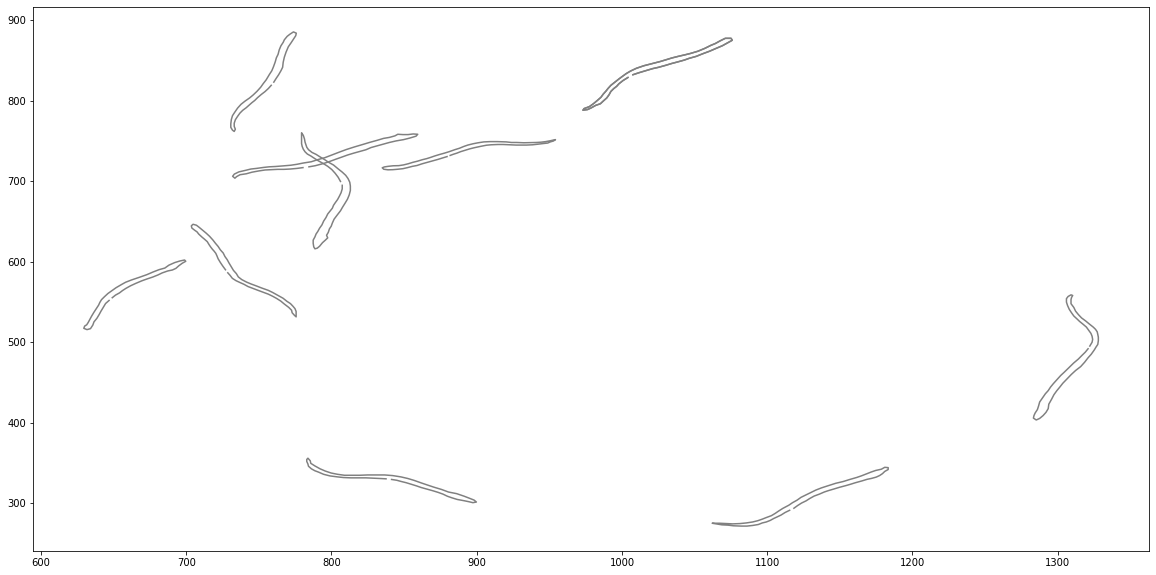

In [ ]:
plt.figure(figsize = (20,10))
plt.xlim(200, 1800)
plt.ylim(top = 1080)
for i in tqdm(range(len(test_list))):
    os.chdir(os.path.join(url, test_list[i]))
    for j in range(50):
        plt.clf()
        for k in range(10):
            for l in range(len(tot_json[i][dex[i][j][k]]['data'])):
                plt.plot(tot_json[i][dex[i][j][k]]['data'][l]['x'], tot_json[i][dex[i][j][k]]['data'][l]['y'], color = 'gray')
        plt.savefig('j' + str(j) + '.jpg')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
os.chdir(url)

In [ ]:
test_list = os.listdir()
print(test_list)

['ZiRGrtFxEb', 'zGVYSzqTOq', 'YWF4peZF2d', 'yyYdnAwplY', 'ZjELqS2JtS', 'Zbeh6lKOIL', 'YUpNjdtBcS', 'ya75FdleJX', 'Y5j5cND6WL', 'xZQH4hLHot', 'XAmjeOrBx0', 'xwlBbazGdz', 'wQTpHfVv6B', 'v95xbKT8nX', 'UCQyj4n1rI', 'xSnT9ciFWW', 'wHajUOQy6P', 'X4HQdtzMpF', 'vqwg4buZTn', 'u1yCf24yuq', 'Trok7zmEXk', 'tECFORl3Fn', 'TAq56NbaKj', 'swUIZhzv5b', 'sxwNnic2bV', 'tq0Q4lPEyN', 'TdKC34lujM', 'tQfalvEiYm', 'SzRk9m0kkv', 'sWmplrUJbl', 'SQ1MYDduAD', 'reRy86u4lX', 'OOCwtre5Pu', 'qHZwDnIa3B', 'nfYxbxbULQ', 'QSaRNpaAxi', 'qhJ2pADf7o', 'pY7VFztZI0', 'rwbWJteGDa', 'QXZXg78Ez1', 'NArDiGh8gw', 'l6GVi4ee0g', 'MijVDHVcap', 'L53qyArvg0', 'JZkEnznMDW', 'MXXkhMBpQC', 'mrlUpGQsYr', 'MLsIqBZKfk', 'lgvc7w93o1', 'K1iKAPTiNV', 'JXqYTYUpqF', 'jKyRSnIsZ3', 'dPgtU0u95r', 'gGqqel3cTv', 'FBhju4brKK', 'hzFdFy7vsF', 'irhq8wNNwt', 'e1D4Cy96yc', 'fP0GkyqpkF', 'Io2LMFqcmM', 'DvqVNumVEJ', 'GTApFLhsh3', 'dnNNw4C2TO', 'dnJNQ0Nqrm', 'dl2b8kIhRe', '7ecRTWUNos', 'DBQDA1yGoy', 'ckN3A3Edwq', 'CsLcMd7ujI', 'DeC6HeH6ca', 'a7IzapJF2P', 'BEIS

In [ ]:
# train set 이미지 generator
image_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = image_gen.flow_from_directory(
    directory = url,
    shuffle=False,
    color_mode = 'grayscale',
    batch_size = 50,
    target_size = (400, 600),
    subset="training",
    class_mode = 'sparse'
)

Found 4250 images belonging to 85 classes.


In [ ]:
prediction = model.predict(test_data_gen)

### 이미지 리스트

In [ ]:
os.chdir('/content/drive/MyDrive/전처리/test')
test_list = os.listdir()
image_list = []

In [ ]:
for i in range(len(test_list)):
  image_list.append(os.path.join(url, test_list[i], '*.jpg'))

# 사진 data
for i in range(len(test_list)):
  i_dat = []
  for j in range(len(image_list)):
    i_dat.append(sorted(glob.glob(image_list[j])))

In [ ]:
pred = []
pred.append(np.mean(prediction[0:len(i_dat[0])]))

In [ ]:
for i in range(len(test_list)-1):
    pred.append(np.mean(prediction[len(i_dat[i]):len(i_dat[i]) + len(i_dat[i+1])]))

In [ ]:
os.chdir('/content/drive/MyDrive/전처리')

In [ ]:
ans = pd.DataFrame({'ImageDir' : test_list,
                    'AvgWeight' : pred})

In [ ]:
ans.to_csv('ans.csv')